In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# загрузим данные
df = pd.read_csv('278houses.csv')
# оставим для удобства только необходимые для заданий 1-3 столбцы
df = df[['price', 'area', 'latitude', 'longitude']]
# уберем разделитель ',' у цены аренды
df['price'] = df['price'].str.replace(',','')
# у домов с 279 по 299 отсутствуют данные по широте и долготе (а также большинство других признаков), 
# поэтому уберем эти строки из датасета
df = df.dropna()
df.head()

,price,area,latitude,longitude
0,1650,85,37.085788,-8.315769
1,885,107,37.123355,-8.548333
2,2250,450,37.095037,-8.167158
3,1200,204,37.077888,-8.115559
4,600,70,37.021266,-7.936947


##Задача 1.
Построить распределение объектов по цене аренды (поле $price$). Вывести на заголовок графика: медианное
значение, 25 и 75 квантили

In [83]:
# def stat_count(data):
#   median = np.median(data)
#   p_25 = np.percentile(data, 25, axis=0)
#   p_75 = np.percentile(data, 75, axis=0)
#   return median, p_25, p_75

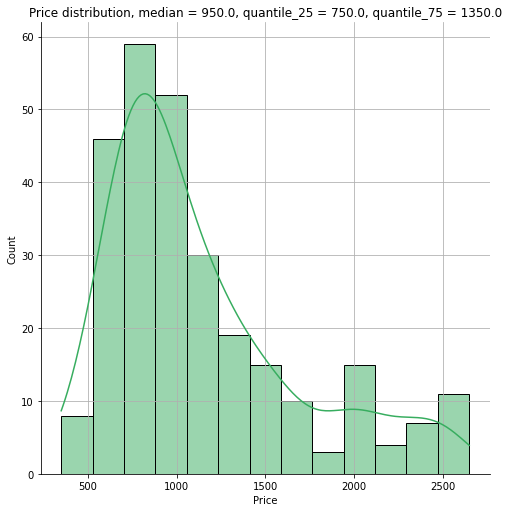

In [84]:
# extract feature with price
price = df['price'].astype(float)
p_25, median, p_75 = price.quantile([.25, .5, .75])

sns.displot(price, color='#37ad5f', height=7, kde=True)
plt.grid()
plt.xlabel('Price')
plt.title('Price distribution, median = ' + str(median) + ', quantile_25 = ' + 
          str(p_25) + ', quantile_75 = ' + str(p_75))
plt.show()

In [85]:
# создадим новый набор данных, в котором значения price лежат в диапазоне [p_25; p_75]
cond_1 = df["price"].astype(float) >= p_25
cond_2 = df["price"].astype(float) <= p_75

new_df = df.loc[cond_1 & cond_2]
new_df.head()

,price,area,latitude,longitude
1,885,107,37.123355,-8.548333
3,1200,204,37.077888,-8.115559
7,1000,150,37.044726,-7.833612
12,850,95,37.129398,-8.591779
13,900,87,37.122186,-7.652593


##Задача 2.
Для объектов, у которых значение цены лежит между 25 и 75 квантилем *(см задача 1)*, построить
распределение площади. Вывести на заголовок графика: медианное значение, 25 и 75 квантили


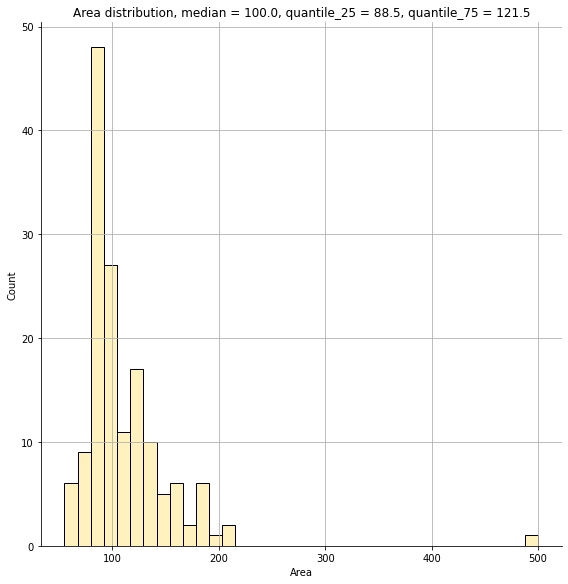

In [86]:
# extract feature with area
area = new_df['area']
p_25, median, p_75 = area.quantile([.25, .5, .75])

sns.displot(area, color='#ffeea8', height=8)
plt.grid()
plt.xlabel('Area')
plt.title('Area distribution, median = ' + str(median) + ', quantile_25 = ' 
          + str(p_25) + ', quantile_75 = ' + str(p_75))
plt.show()

##Задача 3.
Для объектов у которых значение цены лежит между 25 и 75 квантилем *(см задача 1)* найти количество
объектов в радиусе 1 км.
Построить распределение этого количества.

In [ ]:
import geopy.distance

count = np.zeros(len(new_df['price']))

for i, house in enumerate(new_df['price']):
  for j, house in enumerate(new_df['price']):
    if ((geopy.distance.vincenty((new_df['latitude'].iloc[i], new_df['longitude'].iloc[i]),
                                 (new_df['latitude'].iloc[j], new_df['longitude'].iloc[j])).km) <= 1.0
    and (i!=j)):
      count[i] += 1

new_df['number_in_km'] = count

In [88]:
new_df.head()

,price,area,latitude,longitude,number_in_km
1,885,107,37.123355,-8.548333,3.0
3,1200,204,37.077888,-8.115559,6.0
7,1000,150,37.044726,-7.833612,0.0
12,850,95,37.129398,-8.591779,0.0
13,900,87,37.122186,-7.652593,7.0


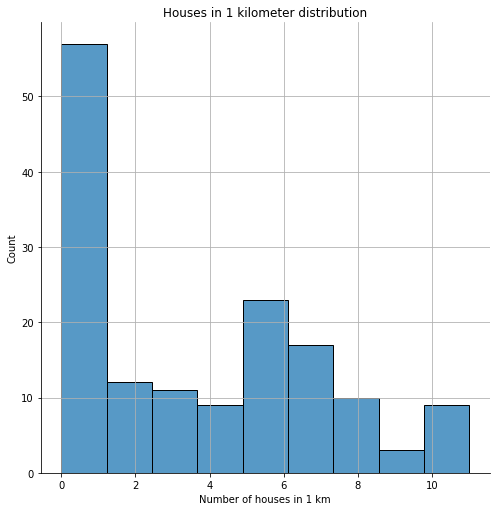

In [89]:
count = new_df['number_in_km']
sns.displot(count, height=7)
plt.title('Houses in 1 kilometer distribution')
plt.xlabel('Number of houses in 1 km')
plt.grid()
plt.show()